In [1]:
import geopandas as gpd
from shapely.geometry import Polygon, Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import perf_counter
import datetime as dt
import gif
import mapclassify
%matplotlib inline

In [18]:
# do not run this cell again
# read registryupload
link1 = r'Data/FracFocusCSV/registryupload_1.csv'
link2 = r'Data/FracFocusCSV/registryupload_2.csv'
link3 = r'Data/FracFocusCSV/registryupload_3.csv'

df1 = pd.read_csv(link1,dtype='unicode')
df2 = pd.read_csv(link2,dtype='unicode')
df3 = pd.read_csv(link3,dtype='unicode')
df = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
df.to_feather('Data/registryupload.feather')

In [22]:
# do not run this cell again
# read FracFocusRegistry
start = perf_counter()
for i in range(1,25):
    link = f'Data/FracFocusCSV/FracFocusRegistry_{i}.csv'
    df1 = pd.read_csv(link,dtype='unicode')
    if i == 1:
        df = df1
    else:
        df = pd.concat([df,df1],axis=0,ignore_index=True)
print(perf_counter()-start)
df.to_feather('Data/FracFocusRegistry.feather')

76.01112816599198


In [2]:
start = perf_counter()
df1 = pd.read_feather('Data/FracFocusRegistry.feather')
print(perf_counter()-start)

10.0418603339931


In [2]:
start = perf_counter()
df2 = pd.read_feather('Data/registryupload.feather')
print(perf_counter()-start)

0.2112146250437945


In [4]:
df1.columns

Index(['UploadKey', 'JobStartDate', 'JobEndDate', 'APINumber', 'StateNumber',
       'CountyNumber', 'OperatorName', 'WellName', 'Latitude', 'Longitude',
       'Projection', 'TVD', 'TotalBaseWaterVolume', 'TotalBaseNonWaterVolume',
       'StateName', 'CountyName', 'FFVersion', 'FederalWell', 'IndianWell',
       'Source', 'DTMOD', 'PurposeKey', 'TradeName', 'Supplier', 'Purpose',
       'SystemApproach', 'IsWater', 'PurposePercentHFJob',
       'PurposeIngredientMSDS', 'IngredientKey', 'IngredientName', 'CASNumber',
       'PercentHighAdditive', 'PercentHFJob', 'IngredientComment',
       'IngredientMSDS', 'MassIngredient', 'ClaimantCompany', 'DisclosureKey'],
      dtype='object')

In [3]:
df2.columns

Index(['index', 'pKey', 'JobStartDate', 'JobEndDate', 'APINumber',
       'StateNumber', 'CountyNumber', 'OperatorName', 'WellName', 'Latitude',
       'Longitude', 'Projection', 'TVD', 'TotalBaseWaterVolume',
       'TotalBaseNonWaterVolume', 'StateName', 'CountyName', 'FFVersion',
       'FederalWell', 'IndianWell', 'Source', 'DTMOD', 'CountyFIPS'],
      dtype='object')

In [4]:
df2['JobStartDate'] = pd.to_datetime(df2['JobStartDate'],errors='coerce')
df2['JobEndDate'] = pd.to_datetime(df2['JobEndDate'],errors='coerce')
df2

,index,pKey,JobStartDate,JobEndDate,APINumber,StateNumber,CountyNumber,OperatorName,WellName,Latitude,...,TotalBaseWaterVolume,TotalBaseNonWaterVolume,StateName,CountyName,FFVersion,FederalWell,IndianWell,Source,DTMOD,CountyFIPS
0,0,448c1dab-c7fd-4e07-9d6f-e3b1cf64b708,1955-05-01 00:00:00,1955-05-01 00:00:00,42317372620000,42,317,Pioneer Natural Resources,Rogers 42 #5,32.28343107,...,None,None,Texas,Martin,1,False,False,None,None,48317
1,1,f66add2e-8ea8-4843-9388-24725b5d37c1,1982-05-19 00:00:00,1982-05-19 00:00:00,49009219470000,49,009,"Chesapeake Operating, Inc.",WILLIAM VALENTINE 1,42.97281,...,None,None,WYOMING,CONVERSE,1,False,False,None,None,56009
2,2,95f0904c-2556-4912-9f5a-34913ba57625,1995-02-07 00:00:00,1995-02-07 00:00:00,49009228850000,49,009,"Chesapeake Operating, Inc.",LIZARD HEAD 1-8H RE,42.85147,...,None,None,WYOMING,CONVERSE,1,False,False,None,None,56009
3,3,5a9513e7-b79f-4488-9f64-fa0960e595f3,1996-06-11 00:00:00,1996-06-11 00:00:00,42335355480000,42,335,Energen Resources Corporation,North Westbrook Unit/Well No. 3032,32.44026,...,None,None,Texas,Mitchell,1,False,False,None,None,48335
4,4,36368c95-a097-40ea-bb9f-2b647de7b913,2001-12-13 00:00:00,2001-12-13 00:00:00,42395313840000,42,395,XTO Energy/ExxonMobil,Olene Reagan 3-1,31.25798,...,None,None,Texas,Robertson,1,False,False,None,None,48395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203173,203188,b95dee31-4225-41a0-8bed-036eb3f57796,2023-02-05 00:00:00,2023-02-25 00:00:00,42329460050000,42,329,Endeavor Energy Resources,WTH 21-16 H #282R,31.85745,...,22682660,0,Texas,Midland,3,False,False,None,None,48329
203174,203189,3fc7f0d4-971e-4dab-a9ce-f2d5c8b97827,2023-01-27 14:48:00,2023-02-25 08:39:00,30025496740000,30,025,COG Operating LLC,Supreme Federal Com 605H,32.284163,...,30739272,0,New Mexico,Lea,3,True,False,None,None,35025
203175,203190,9d94587c-9752-43a4-9321-939352fa36dc,2023-01-27 18:40:00,2023-02-25 11:35:00,30025496750000,30,025,COG Operating LLC,Supreme Federal Com 606H,32.284163,...,31146084,0,New Mexico,Lea,3,True,False,None,None,35025
203176,203191,ddf7d5a1-6625-469c-ab5d-7d666e70e346,2023-01-27 21:53:00,2023-02-25 14:38:00,30025496760000,30,025,COG Operating LLC,Supreme Federal Com 607H,32.284163,...,31045779,0,New Mexico,Lea,3,True,False,None,None,35025


In [12]:
df1['JobStartDate'] = pd.to_datetime(df1['JobStartDate'],errors='coerce')
df1['JobEndDate'] = pd.to_datetime(df1['JobEndDate'],errors='coerce')
# get ride of non-time invalid entries
df1 = df1[df1['JobStartDate']<dt.datetime(2024,1,1)]
df2 = df2[df2['JobStartDate']<dt.datetime(2024,1,1)]

In [5]:
df2 = df2[df2['JobStartDate']<dt.datetime(2024,1,1)]

In [6]:
county_path = r'Data/cb_2021_us_county_500k/cb_2021_us_county_500k.shp'
counties = gpd.read_file(county_path)

In [25]:
# df2 StateNumber to State FIPS conversion
di = {'42':'48','49':'56','37':'42','33':'38','30':'35','05':'08','47':'54','03':'05','35':'40','17':'22','50':'02','43':'49','15':'20','25':'30','04':'06','21':'26','01':'01','45':'51','34':'39','23':'28','26':'31','12':'17','27':'32','13':'18','16':'21','31':'36','11':'16','32':'37'}
di

{'42': '48',
 '49': '56',
 '37': '42',
 '33': '38',
 '30': '35',
 '05': '08',
 '47': '54',
 '03': '05',
 '35': '40',
 '17': '22',
 '50': '02',
 '43': '49',
 '15': '20',
 '25': '30',
 '04': '06',
 '21': '26',
 '01': '01',
 '45': '51',
 '34': '39',
 '23': '28',
 '26': '31',
 '12': '17',
 '27': '32',
 '13': '18',
 '16': '21',
 '31': '36',
 '11': '16',
 '32': '37'}

In [22]:
for i in df2['StateNumber'].unique().tolist():
    print(i,df2[df2['StateNumber']==i]['StateName'].iloc[0])


42 Texas
49 WYOMING
37 PA
33 North Dakota
30 NEW MEXICO
05 Colorado
47 WV
03 Arkansas
35 Oklahoma
17 Louisiana
50 Alaska
43 Utah
15 Kansas
25 Montana
04 California
21 Michigan
01 Alabama
45 Virginia
34 OHIO
23 Mississippi
26 Nebraska
12 Illinois
27 Nevada
13 Indiana
16 Kentucky
31 New York
11 Idaho
32 North Carolina


In [30]:
for i,r in df2.iterrows():
    df2.loc[i,'CountyFIPS'] = di[r['StateNumber']]+r['CountyNumber']
df2

,pKey,JobStartDate,JobEndDate,APINumber,StateNumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,...,TotalBaseWaterVolume,TotalBaseNonWaterVolume,StateName,CountyName,FFVersion,FederalWell,IndianWell,Source,DTMOD,CountyFIPS
0,448c1dab-c7fd-4e07-9d6f-e3b1cf64b708,1955-05-01 00:00:00,1955-05-01 00:00:00,42317372620000,42,317,Pioneer Natural Resources,Rogers 42 #5,32.28343107,-101.9065747,...,None,None,Texas,Martin,1,False,False,None,None,48317
1,f66add2e-8ea8-4843-9388-24725b5d37c1,1982-05-19 00:00:00,1982-05-19 00:00:00,49009219470000,49,009,"Chesapeake Operating, Inc.",WILLIAM VALENTINE 1,42.97281,-105.95384,...,None,None,WYOMING,CONVERSE,1,False,False,None,None,56009
2,95f0904c-2556-4912-9f5a-34913ba57625,1995-02-07 00:00:00,1995-02-07 00:00:00,49009228850000,49,009,"Chesapeake Operating, Inc.",LIZARD HEAD 1-8H RE,42.85147,-105.41151,...,None,None,WYOMING,CONVERSE,1,False,False,None,None,56009
3,5a9513e7-b79f-4488-9f64-fa0960e595f3,1996-06-11 00:00:00,1996-06-11 00:00:00,42335355480000,42,335,Energen Resources Corporation,North Westbrook Unit/Well No. 3032,32.44026,-101.03013,...,None,None,Texas,Mitchell,1,False,False,None,None,48335
4,36368c95-a097-40ea-bb9f-2b647de7b913,2001-12-13 00:00:00,2001-12-13 00:00:00,42395313840000,42,395,XTO Energy/ExxonMobil,Olene Reagan 3-1,31.25798,-96.37482,...,None,None,Texas,Robertson,1,False,False,None,None,48395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203188,b95dee31-4225-41a0-8bed-036eb3f57796,2023-02-05 00:00:00,2023-02-25 00:00:00,42329460050000,42,329,Endeavor Energy Resources,WTH 21-16 H #282R,31.85745,-101.854965277778,...,22682660,0,Texas,Midland,3,False,False,None,None,48329
203189,3fc7f0d4-971e-4dab-a9ce-f2d5c8b97827,2023-01-27 14:48:00,2023-02-25 08:39:00,30025496740000,30,025,COG Operating LLC,Supreme Federal Com 605H,32.284163,-103.580898,...,30739272,0,New Mexico,Lea,3,True,False,None,None,35025
203190,9d94587c-9752-43a4-9321-939352fa36dc,2023-01-27 18:40:00,2023-02-25 11:35:00,30025496750000,30,025,COG Operating LLC,Supreme Federal Com 606H,32.284163,-103.580995,...,31146084,0,New Mexico,Lea,3,True,False,None,None,35025
203191,ddf7d5a1-6625-469c-ab5d-7d666e70e346,2023-01-27 21:53:00,2023-02-25 14:38:00,30025496760000,30,025,COG Operating LLC,Supreme Federal Com 607H,32.284163,-103.581092,...,31045779,0,New Mexico,Lea,3,True,False,None,None,35025


In [74]:
df2.reset_index().to_feather('Data/registryupload.feather')

In [80]:
county_li = df2['CountyFIPS'].unique().tolist()
len(county_li)

608

In [49]:
geoid_li = counties['GEOID'].unique().tolist()

In [73]:
common_li = set(county_li).intersection(geoid_li)
len(common_li)

608

In [58]:
uncommon_li = [i for i in county_li if i not in geoid_li]
len(uncommon_li)

4

In [59]:
df3 = df2[df2['CountyFIPS'].isin(uncommon_li)]

In [54]:
for i,r in df2[df2['CountyFIPS'] == ''].iterrows():
    df2.loc[i,'CountyFIPS'] = r.StateNumber+r.CountyNumber

In [62]:
di = dict.fromkeys(uncommon_li,'')
for i in uncommon_li:
    r = df3[df3['CountyFIPS']==i].iloc[0]
    pt = Point(r.Longitude,r.Latitude)
    for j in counties['GEOID'].unique().tolist():
        poly = counties[counties['GEOID']==j].geometry
        if pt.within(poly).iloc[0]:
            di[i] = j
            print(i,j)
            break

In [71]:
for i,r in df2.iterrows():
    if r.CountyFIPS in di.keys():
        df2.loc[i,'CountyFIPS'] = di[r.CountyFIPS]
    

In [70]:
di['04237'] = '06037'
di['50703'] = '02185'
di['50733'] = '02122'
di['03729'] = '05129'

In [76]:
df2 = df2.drop(columns='index')

In [104]:
df2.reset_index().to_feather('Data/registryupload.feather')

In [79]:
df2

,pKey,JobStartDate,JobEndDate,APINumber,StateNumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,...,TotalBaseWaterVolume,TotalBaseNonWaterVolume,StateName,CountyName,FFVersion,FederalWell,IndianWell,Source,DTMOD,CountyFIPS
0,448c1dab-c7fd-4e07-9d6f-e3b1cf64b708,1955-05-01 00:00:00,1955-05-01 00:00:00,42317372620000,42,317,Pioneer Natural Resources,Rogers 42 #5,32.28343107,-101.9065747,...,None,None,Texas,Martin,1,False,False,None,None,48317
1,f66add2e-8ea8-4843-9388-24725b5d37c1,1982-05-19 00:00:00,1982-05-19 00:00:00,49009219470000,49,009,"Chesapeake Operating, Inc.",WILLIAM VALENTINE 1,42.97281,-105.95384,...,None,None,WYOMING,CONVERSE,1,False,False,None,None,56009
2,95f0904c-2556-4912-9f5a-34913ba57625,1995-02-07 00:00:00,1995-02-07 00:00:00,49009228850000,49,009,"Chesapeake Operating, Inc.",LIZARD HEAD 1-8H RE,42.85147,-105.41151,...,None,None,WYOMING,CONVERSE,1,False,False,None,None,56009
3,5a9513e7-b79f-4488-9f64-fa0960e595f3,1996-06-11 00:00:00,1996-06-11 00:00:00,42335355480000,42,335,Energen Resources Corporation,North Westbrook Unit/Well No. 3032,32.44026,-101.03013,...,None,None,Texas,Mitchell,1,False,False,None,None,48335
4,36368c95-a097-40ea-bb9f-2b647de7b913,2001-12-13 00:00:00,2001-12-13 00:00:00,42395313840000,42,395,XTO Energy/ExxonMobil,Olene Reagan 3-1,31.25798,-96.37482,...,None,None,Texas,Robertson,1,False,False,None,None,48395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203173,b95dee31-4225-41a0-8bed-036eb3f57796,2023-02-05 00:00:00,2023-02-25 00:00:00,42329460050000,42,329,Endeavor Energy Resources,WTH 21-16 H #282R,31.85745,-101.854965277778,...,22682660,0,Texas,Midland,3,False,False,None,None,48329
203174,3fc7f0d4-971e-4dab-a9ce-f2d5c8b97827,2023-01-27 14:48:00,2023-02-25 08:39:00,30025496740000,30,025,COG Operating LLC,Supreme Federal Com 605H,32.284163,-103.580898,...,30739272,0,New Mexico,Lea,3,True,False,None,None,35025
203175,9d94587c-9752-43a4-9321-939352fa36dc,2023-01-27 18:40:00,2023-02-25 11:35:00,30025496750000,30,025,COG Operating LLC,Supreme Federal Com 606H,32.284163,-103.580995,...,31146084,0,New Mexico,Lea,3,True,False,None,None,35025
203176,ddf7d5a1-6625-469c-ab5d-7d666e70e346,2023-01-27 21:53:00,2023-02-25 14:38:00,30025496760000,30,025,COG Operating LLC,Supreme Federal Com 607H,32.284163,-103.581092,...,31045779,0,New Mexico,Lea,3,True,False,None,None,35025


In [92]:
dfc = pd.DataFrame(columns=['county_fips','yearmonth','wellslist','wells','watervol','nonwatervol','watervolperwell','nonwatervolperwell'])
dfc['yearmonth'] = pd.to_datetime(dfc['yearmonth'])

In [93]:

for d in pd.date_range(start='2012-01-01',end='2023-03-01',freq='M'):
    for c in df2['CountyFIPS'].unique().tolist():
        dft = df2[(df2['CountyFIPS']==c)&(df2['JobStartDate']<=d)&(df2['JobStartDate']>=dt.datetime(d.year,d.month,1))].copy()
        wellslist = []
        wells,watervol,nonwatervol,watervolperwell,nonwatervolperwell = 0,0,0,None,None
        for i,r in dft.iterrows():
            if (r.TotalBaseWaterVolume is not None) | (r.TotalBaseNonWaterVolume is not None):
                wellslist.append(r.APINumber)
                wells += 1
                if r.TotalBaseWaterVolume is not None:
                    watervol += float(r.TotalBaseWaterVolume)
                if r.TotalBaseNonWaterVolume is not None:
                    nonwatervol += float(r.TotalBaseNonWaterVolume)
        if (wells>0) & (watervol>0):
            watervolperwell = watervol/wells
        if (wells>0) & (nonwatervol>0):
            nonwatervolperwell = nonwatervol/wells
        di = {'county_fips':c,'yearmonth':d,'wellslist':str(wellslist),'wells':wells,'watervol':watervol,'nonwatervol':nonwatervol,'watervolperwell':watervolperwell,'nonwatervolperwell':nonwatervolperwell}
        df_di = pd.DataFrame(di,index=[0])
        dfc = pd.concat([dfc,df_di],ignore_index=True)
    print("finished", d)

finished 2012-01-31 00:00:00
finished 2012-02-29 00:00:00
finished 2012-03-31 00:00:00
finished 2012-04-30 00:00:00
finished 2012-05-31 00:00:00
finished 2012-06-30 00:00:00
finished 2012-07-31 00:00:00
finished 2012-08-31 00:00:00
finished 2012-09-30 00:00:00
finished 2012-10-31 00:00:00
finished 2012-11-30 00:00:00
finished 2012-12-31 00:00:00
finished 2013-01-31 00:00:00
finished 2013-02-28 00:00:00
finished 2013-03-31 00:00:00
finished 2013-04-30 00:00:00
finished 2013-05-31 00:00:00
finished 2013-06-30 00:00:00
finished 2013-07-31 00:00:00
finished 2013-08-31 00:00:00
finished 2013-09-30 00:00:00
finished 2013-10-31 00:00:00
finished 2013-11-30 00:00:00
finished 2013-12-31 00:00:00
finished 2014-01-31 00:00:00
finished 2014-02-28 00:00:00
finished 2014-03-31 00:00:00
finished 2014-04-30 00:00:00
finished 2014-05-31 00:00:00
finished 2014-06-30 00:00:00
finished 2014-07-31 00:00:00
finished 2014-08-31 00:00:00
finished 2014-09-30 00:00:00
finished 2014-10-31 00:00:00
finished 2014-

In [101]:
for i,r in dfc.iterrows():
    dfc.loc[i,'geometry'] = counties[counties['GEOID']==r.county_fips].geometry.iloc[0]

In [105]:
dfc = gpd.GeoDataFrame(dfc,geometry=dfc.geometry)
dfc['watervolperwellf'] = dfc['watervolperwell']/1000000
dfc['nonwatervolperwellf'] = dfc['nonwatervolperwell']/1000

,county_fips,yearmonth,wellslist,wells,watervol,nonwatervol,watervolperwell,nonwatervolperwell,geometry
0,48317,2012-01-31,"['42317381690000', '42317356490000', '42317372...",4,4685323.0,0.0,1171330.75,NaN,"POLYGON ((-102.21103 32.17704, -102.21111 32.3..."
1,56009,2012-01-31,[],0,0.0,0.0,None,NaN,"POLYGON ((-106.07807 43.49447, -106.01737 43.4..."
2,48335,2012-01-31,[],0,0.0,0.0,None,NaN,"POLYGON ((-101.18182 32.18688, -101.18165 32.1..."
3,48395,2012-01-31,[],0,0.0,0.0,None,NaN,"POLYGON ((-96.83110 31.10234, -96.82951 31.105..."
4,42059,2012-01-31,['37059258310000'],1,3603852.0,0.0,3603852.0,NaN,"POLYGON ((-80.51942 39.80618, -80.51923 39.837..."
...,...,...,...,...,...,...,...,...,...
81467,05129,2023-02-28,[],0,0.0,0.0,None,None,"POLYGON ((-92.94961 35.80528, -92.94949 35.813..."
81468,48307,2023-02-28,[],0,0.0,0.0,None,None,"POLYGON ((-99.60368 30.98074, -99.60322 31.087..."
81469,36111,2023-02-28,[],0,0.0,0.0,None,None,"POLYGON ((-74.78069 42.01637, -74.74960 42.030..."
81470,22117,2023-02-28,[],0,0.0,0.0,None,None,"POLYGON ((-90.34723 31.00036, -90.34601 31.000..."


In [116]:
excl_state_fips_li = ['02','78','15'] # exlude alaska, virgin islands, hawaii
states_path = r'Data/cb_2021_us_state_500k/cb_2021_us_state_500k.shp'
states = gpd.read_file(states_path)

/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/plotting.py:807: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


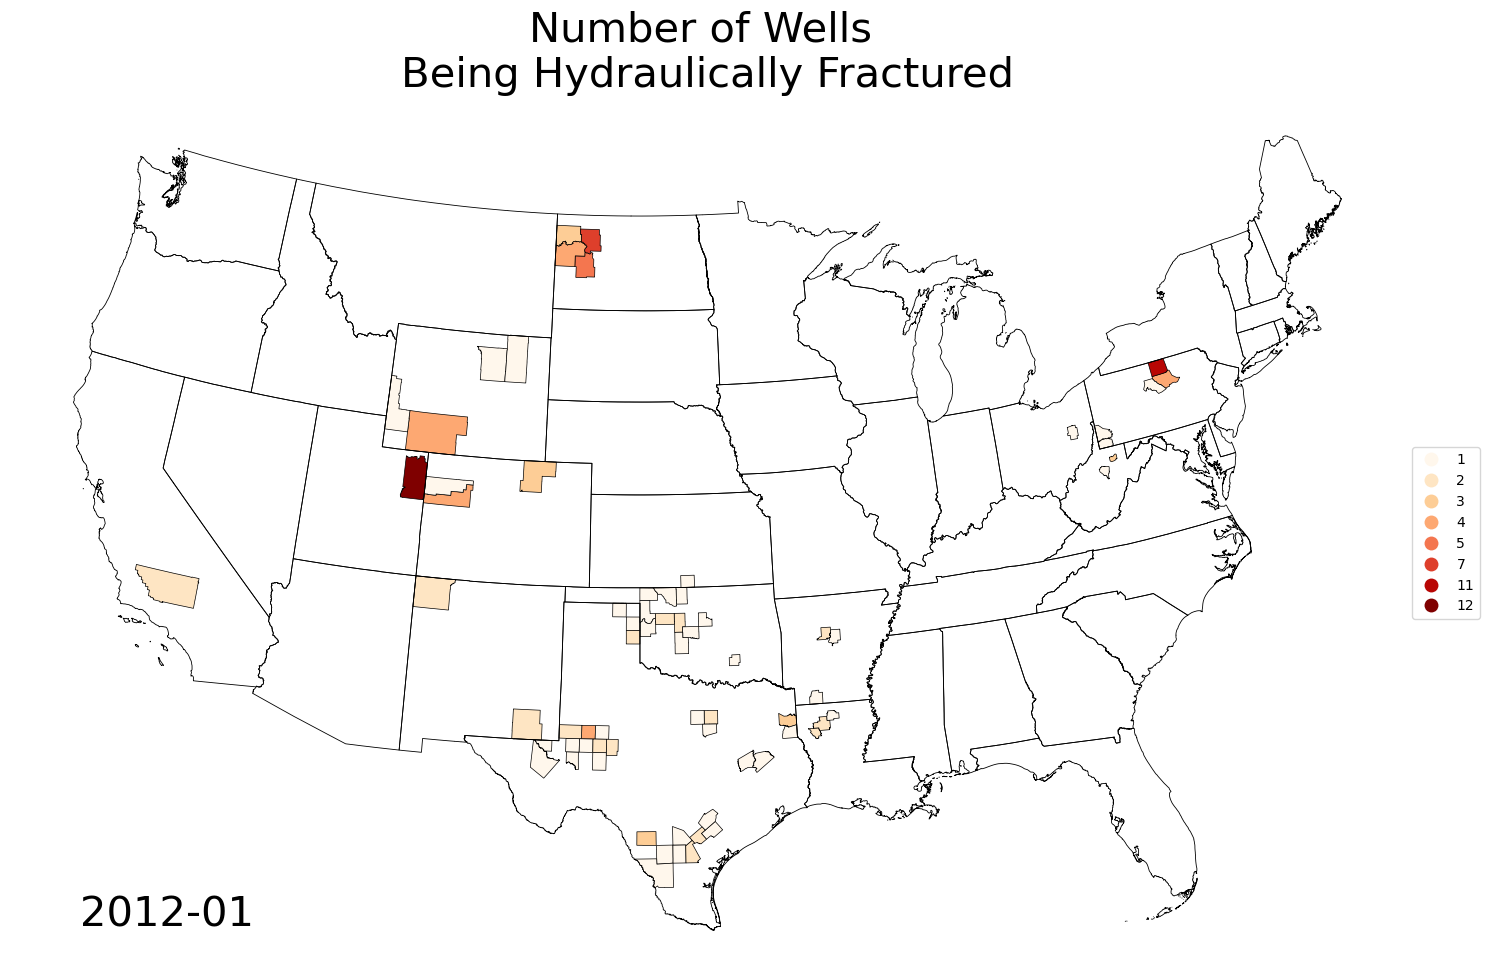

In [187]:
visframe = states.to_crs({'init':'epsg:2163'})
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

for i in range(2012,2023):
    for j in range(1,13):
        dfp = dfc[(dfc['yearmonth'].dt.year==i)&(dfc['yearmonth'].dt.month==j)&(dfc['watervolperwell']>0)&(~dfc['county_fips'].str[:2].isin(excl_state_fips_li))]
        visframe1 = dfp.to_crs({'init':'epsg:2163'})

        visframe[~visframe.NAME.isin(['Alaska','Hawaii','Puerto Rico','American Samoa','Guam','United States Virgin Islands','Commonwealth of the Northern Mariana Islands'])].geometry.boundary.plot(color=None, linewidth=0.6, ax=ax, edgecolor='k')
        visframe1.plot(column='wells',
                    cmap='OrRd',
                    edgecolor='black',
                    linewidth=0.5,
                    ax=ax,
                    legend=True,
                    legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),'fmt': "{:.0f}"})
        if j<10:
            j_str = '0'+str(j)
        else:
            j_str = str(j)
        ax.text(0.05,0.05,f'{i}-{j_str}',transform=ax.transAxes,fontsize=30)
        break
    break
# plt.clf()
plt.title('Number of Wells \nBeing Hydraulically Fractured',fontsize=30)
plt.show()

In [182]:
gif.options.matplotlib['dpi']=100

@gif.frame
def plot(i,j):
    visframe = states.to_crs({'init':'epsg:2163'})
    fig, ax = plt.subplots(1, figsize=(9, 7))
    ax.axis('off')
    dfp = dfc[(dfc['yearmonth'].dt.year==i)&(dfc['yearmonth'].dt.month==j)&(dfc['watervolperwell']>0)&(~dfc['county_fips'].str[:2].isin(excl_state_fips_li))]
    visframe1 = dfp.to_crs({'init':'epsg:2163'})

    visframe[~visframe.NAME.isin(['Alaska','Hawaii','Puerto Rico','American Samoa','Guam','United States Virgin Islands','Commonwealth of the Northern Mariana Islands'])].geometry.boundary.plot(color=None, linewidth=0.6, ax=ax, edgecolor='k')
    visframe1.plot(column='wells',
                scheme='QUANTILES',
                cmap='OrRd',
                edgecolor='black',
                linewidth=0.5,
                ax=ax,
                k=8,
                legend=True,
                legend_kwds={'loc': 'center left', 'bbox_to_anchor':(0.9,0.33),'fmt': "{:.0f}"})
    if j<10:
        j_str = '0'+str(j)
    else:
        j_str = str(j)
    ax.text(0.05,0.05,f'{i}-{j_str}',transform=ax.transAxes,fontsize=30)
    plt.title('Number of Wells Being Hydraulically Fractured',fontsize=20)

frames = []
for i in range(2012,2023):
    for j in range(1,13):
        frames.append(plot(i,j))

gif.save(frames,'Plots/county_by_wells.gif',duration=200) # duration is milliseconds between each frame
    

/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 8 classes. Setting k to 4.
  warnings.warn(
/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_

/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


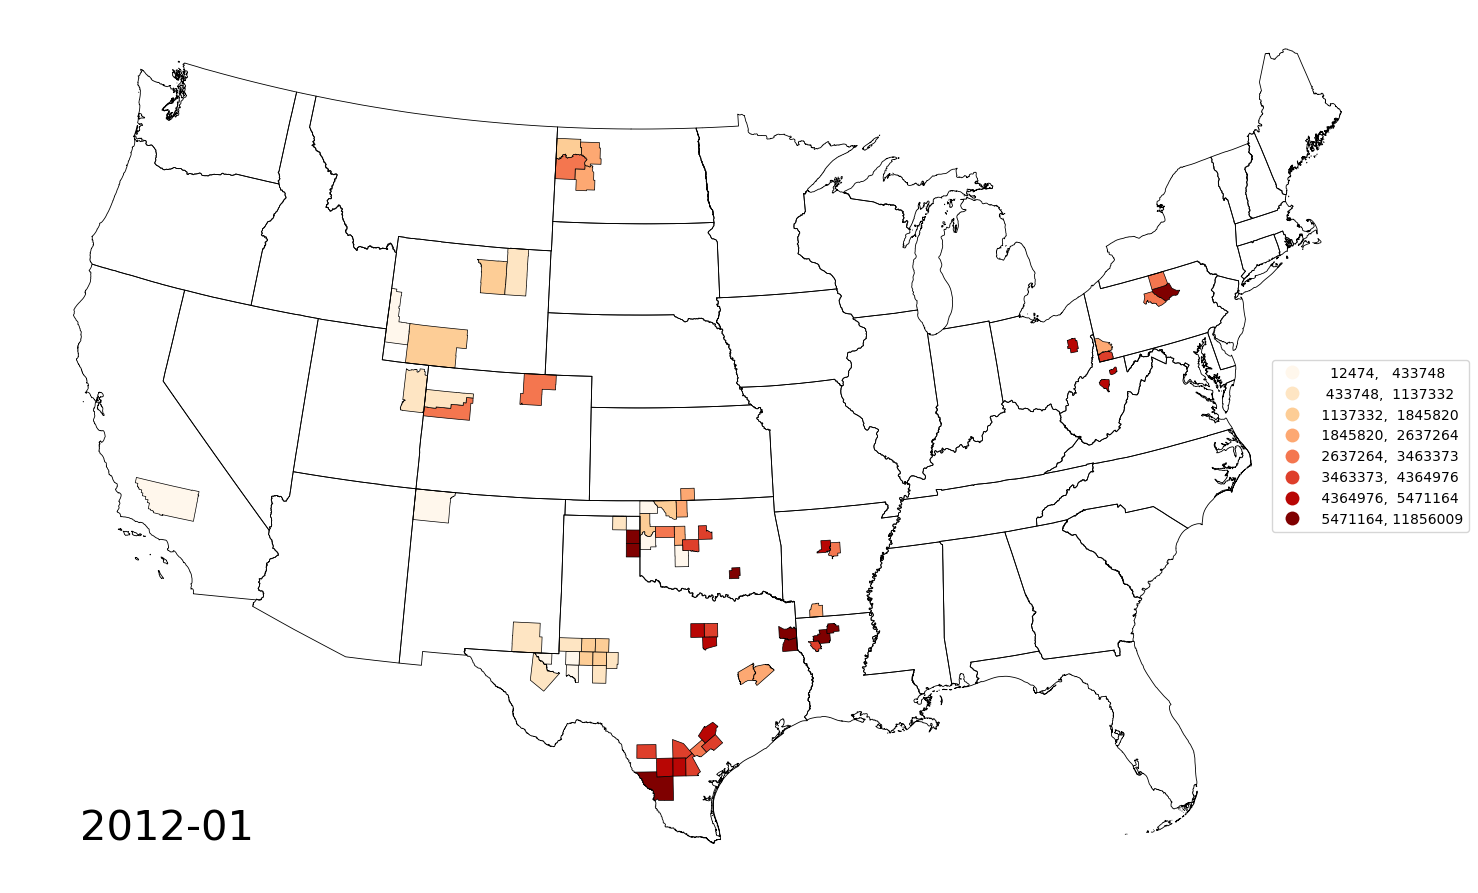

In [170]:
visframe = states.to_crs({'init':'epsg:2163'})
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

for i in range(2012,2023):
    for j in range(1,13):
        dfp = dfc[(dfc['yearmonth'].dt.year==i)&(dfc['yearmonth'].dt.month==j)&(dfc['watervolperwell']>0)&(~dfc['county_fips'].str[:2].isin(excl_state_fips_li))]
        visframe1 = dfp.to_crs({'init':'epsg:2163'})

        visframe[~visframe.NAME.isin(['Alaska','Hawaii','Puerto Rico','American Samoa','Guam','United States Virgin Islands','Commonwealth of the Northern Mariana Islands'])].geometry.boundary.plot(color=None, linewidth=0.6, ax=ax, edgecolor='k')
        visframe1.plot(column='watervolperwell',
                    scheme='QUANTILES',
                    cmap='OrRd',
                    edgecolor='black',
                    linewidth=0.5,
                    ax=ax,
                    k=8,
                    legend=True,
                    legend_kwds={'loc': 'center left', 'bbox_to_anchor':(0.9,0.5),'fmt': "{:.0f}"})
        if j<10:
            j_str = '0'+str(j)
        else:
            j_str = str(j)
        ax.text(0.05,0.05,f'{i}-{j_str}',transform=ax.transAxes,fontsize=30)
        break
    break
# plt.clf()
plt.show()

In [191]:
gif.options.matplotlib['dpi']=100

@gif.frame
def plot(i,j):
    visframe = states.to_crs({'init':'epsg:2163'})
    fig, ax = plt.subplots(1, figsize=(9, 7))
    ax.axis('off')
    dfp = dfc[(dfc['yearmonth'].dt.year==i)&(dfc['yearmonth'].dt.month==j)&(dfc['watervolperwell']>0)&(~dfc['county_fips'].str[:2].isin(excl_state_fips_li))]
    visframe1 = dfp.to_crs({'init':'epsg:2163'})

    visframe[~visframe.NAME.isin(['Alaska','Hawaii','Puerto Rico','American Samoa','Guam','United States Virgin Islands','Commonwealth of the Northern Mariana Islands'])].geometry.boundary.plot(color=None, linewidth=0.6, ax=ax, edgecolor='k')
    visframe1.plot(column='watervolperwellf',
                scheme='QUANTILES',
                cmap='OrRd',
                edgecolor='black',
                linewidth=0.5,
                ax=ax,
                k=8,
                legend=True,
                legend_kwds={'loc': 'center left', 'bbox_to_anchor':(0.9,0.33),'fmt': "{:.1f}"})
    if j<10:
        j_str = '0'+str(j)
    else:
        j_str = str(j)
    ax.text(0.05,0.05,f'{i}-{j_str}',transform=ax.transAxes,fontsize=30)
    plt.title('Water Volume (in million gallons per well)\nUsed for Hydraulic Fracturing',fontsize=20)

frames = []
for i in range(2012,2023):
    for j in range(1,13):
        frames.append(plot(i,j))

gif.save(frames,'Plots/county_by_water_usage.gif',duration=200) # duration is milliseconds between each frame

/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>

In [195]:
gif.options.matplotlib['dpi']=100

@gif.frame
def plot(i,j):
    visframe = states.to_crs({'init':'epsg:2163'})
    fig, ax = plt.subplots(1, figsize=(9, 7))
    ax.axis('off')
    dfp = dfc[(dfc['yearmonth'].dt.year==i)&(dfc['yearmonth'].dt.month==j)&(dfc['watervolperwell']>0)&(~dfc['county_fips'].str[:2].isin(excl_state_fips_li))]
    visframe1 = dfp.to_crs({'init':'epsg:2163'})

    visframe[~visframe.NAME.isin(['Alaska','Hawaii','Puerto Rico','American Samoa','Guam','United States Virgin Islands','Commonwealth of the Northern Mariana Islands'])].geometry.boundary.plot(color=None, linewidth=0.6, ax=ax, edgecolor='k')
    visframe1.plot(column='nonwatervolperwellf',
                scheme='QUANTILES',
                cmap='OrRd',
                edgecolor='black',
                linewidth=0.5,
                ax=ax,
                k=8,
                legend=True,
                legend_kwds={'loc': 'center left', 'bbox_to_anchor':(0.9,0.33),'fmt': "{:.0f}"})
    if j<10:
        j_str = '0'+str(j)
    else:
        j_str = str(j)
    ax.text(0.05,0.05,f'{i}-{j_str}',transform=ax.transAxes,fontsize=30)
    plt.title('Non-Water Volume (in thousand gallons per well)\nUsed for Hydraulic Fracturing',fontsize=20)

frames = []
for i in range(2012,2023):
    for j in range(1,13):
        frames.append(plot(i,j))

gif.save(frames,'Plots/county_by_nonwater_usage.gif',duration=200) # duration is milliseconds between each frame

/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/htang/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>

In [196]:
dfc

,county_fips,yearmonth,wellslist,wells,watervol,nonwatervol,watervolperwell,nonwatervolperwell,geometry,watervolperwellf,nonwatervolperwellf
0,48317,2012-01-31,"['42317381690000', '42317356490000', '42317372...",4,4685323.0,0.0,1171330.75,NaN,"POLYGON ((-102.21103 32.17704, -102.21111 32.3...",1.171331,NaN
1,56009,2012-01-31,[],0,0.0,0.0,None,NaN,"POLYGON ((-106.07807 43.49447, -106.01737 43.4...",NaN,NaN
2,48335,2012-01-31,[],0,0.0,0.0,None,NaN,"POLYGON ((-101.18182 32.18688, -101.18165 32.1...",NaN,NaN
3,48395,2012-01-31,[],0,0.0,0.0,None,NaN,"POLYGON ((-96.83110 31.10234, -96.82951 31.105...",NaN,NaN
4,42059,2012-01-31,['37059258310000'],1,3603852.0,0.0,3603852.0,NaN,"POLYGON ((-80.51942 39.80618, -80.51923 39.837...",3.603852,NaN
...,...,...,...,...,...,...,...,...,...,...,...
81467,05129,2023-02-28,[],0,0.0,0.0,None,None,"POLYGON ((-92.94961 35.80528, -92.94949 35.813...",NaN,NaN
81468,48307,2023-02-28,[],0,0.0,0.0,None,None,"POLYGON ((-99.60368 30.98074, -99.60322 31.087...",NaN,NaN
81469,36111,2023-02-28,[],0,0.0,0.0,None,None,"POLYGON ((-74.78069 42.01637, -74.74960 42.030...",NaN,NaN
81470,22117,2023-02-28,[],0,0.0,0.0,None,None,"POLYGON ((-90.34723 31.00036, -90.34601 31.000...",NaN,NaN


In [206]:
dfc['yearmonth'] = dfc['yearmonth'].dt.strftime('%Y-%m-%d')
dfc.to_file('Data/counties_hfwatervol/counties_hfwatervol.shp')

/var/folders/5g/gqwy1_3s2csgd14_p3v7xm1h0000gq/T/ipykernel_71111/2863542837.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  dfc.to_file('Data/counties_hfwatervol/counties_hfwatervol.shp')


In [201]:
link = r'Data/counties_hfwatervol/counties_hfwatervol.shp'
dfc = gpd.read_file(link) #county-level aggregated data
dfc['yearmonth'] = pd.to_datetime(dfc['yearmonth'])
dfc = dfc.rename(columns={'county_fip':'county_fips','nonwatervo':'nonwatervol','watervolpe':'watervolperwell','nonwater_1':'nonwatervolperwell','watervol_1':'watervolperwellf','nonwater_2':'nonwatervolperwellf'})